# YouTubeASL Pose + Hands + Face Keypoints Demo

In [1]:
import json, pathlib, time, cv2
from typing import Dict, List, Tuple
from IPython.display import display, clear_output
from PIL import Image

SKIP_FRAMES = 1                    # >1 to speed up playback
COLORS = {
    "pose": (0, 255, 0),         # green (B,G,R)
    "right": (255, 0, 0),        # blue 
    "left": (0, 0, 255),         # red
    "face": (0, 255, 255),       # yellow
}
RADIUS  = {"pose": 3, "right": 2, "left": 2, "face": 1}

Frame = Dict[str, List[Tuple[float, float]]]  # alias

def load_frames(json_path: pathlib.Path) -> List[Frame]:
    """Return a list where each element holds the four landmark groups for one frame."""
    data = json.loads(json_path.read_text())

    frames: List[Frame] = []
    for fr in data["cropped_keypoints"]:
        frames.append({
            "pose":  fr.get("pose_landmarks",        []),
            "right": fr.get("right_hand_landmarks",  []),
            "left":  fr.get("left_hand_landmarks",   []),
            "face":  fr.get("face_landmarks",        []),
        })
    return frames


def draw_groups(img, groups: Frame) -> None:
    """Draw dots for every landmark group onto *img* (in‑place)."""
    for group, pts in groups.items():
        color = COLORS[group]
        radius = RADIUS[group]
        for x, y in pts:
            cv2.circle(img, (int(round(x)), int(round(y))), radius, color, -1, cv2.LINE_AA)


def show_clip(mp4_path: pathlib.Path) -> None:
    json_path = mp4_path.with_suffix(".json")
    frames = load_frames(json_path)

    cap = cv2.VideoCapture(str(mp4_path))
    fps = cap.get(cv2.CAP_PROP_FPS) or 30
    delay = 1 / fps

    idx = 0
    while True:
        ok, frame = cap.read()
        if not ok or idx >= len(frames):
            break

        if idx % SKIP_FRAMES == 0:
            draw_groups(frame, frames[idx])
            # Convert BGR‑>RGB for PIL / display()
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            clear_output(wait=True)
            display(Image.fromarray(rgb))
            time.sleep(delay)

        idx += 1

    cap.release()
    clear_output(wait=True)

## Show 5 examples from the dataset

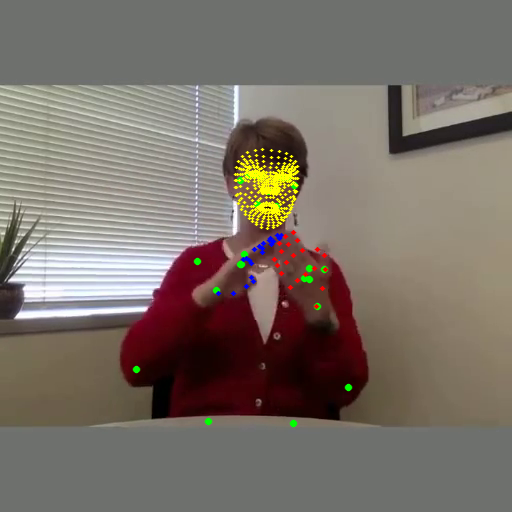

In [2]:
show_clip(pathlib.Path("0ETUgBcLLX0.001462-001707.mp4"))

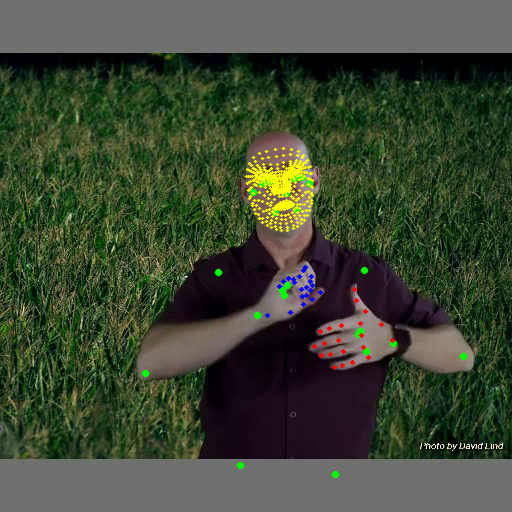

In [3]:
show_clip(pathlib.Path("1NNpTjkA-Vc.003440-003466.mp4"))

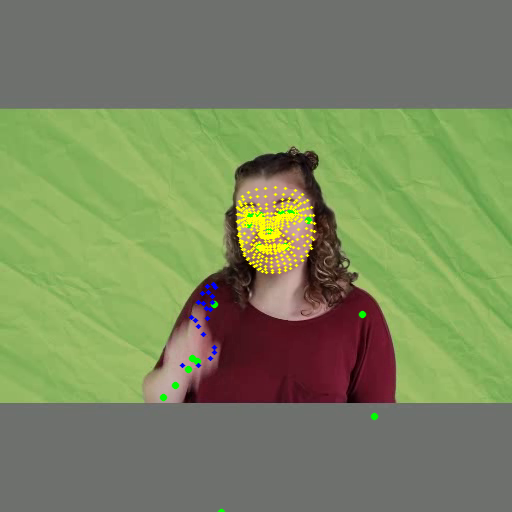

In [4]:
show_clip(pathlib.Path("3D75qSOTAvk.000135-000305.mp4"))

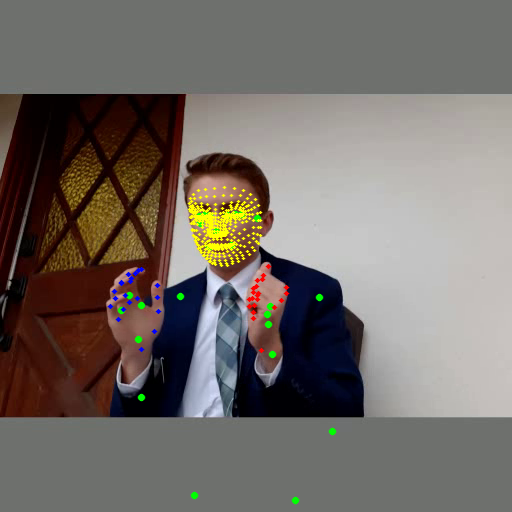

In [5]:
show_clip(pathlib.Path("5jBvbdAiwP4.008377-008501.mp4"))

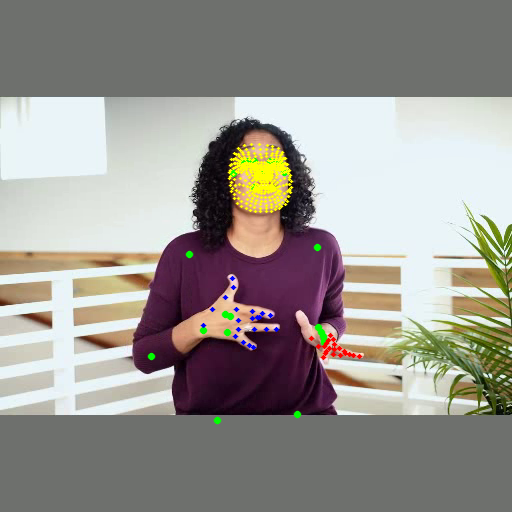

In [6]:
show_clip(pathlib.Path("66_C4RzxVd0.004288-004424.mp4"))